# **DATA PREPROCESSING**


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

**IMPORTING THE DATA**

In [53]:
data=pd.read_csv('/content/House_Pricing.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


**to display all columns**

In [54]:
#pd.set_option('display.max_columns',None)

**ABOUT THE DATA**

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [56]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [57]:
data.shape

(21613, 21)

In [58]:
data.ndim

2

In [59]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

**TARGET STUDY**

In [60]:
data['Sale Price'].describe()

,Sale Price
count,2.160900e+04
mean,5.401984e+05
std,3.673890e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


(array([ 501., 3379., 4513., 3911., 3069., 1977., 1432.,  877.,  531.,
        1419.]),
 array([  75000. ,  180457.5,  285915. ,  391372.5,  496830. ,  602287.5,
         707745. ,  813202.5,  918660. , 1024117.5, 1129575. ]),
 <BarContainer object of 10 artists>)

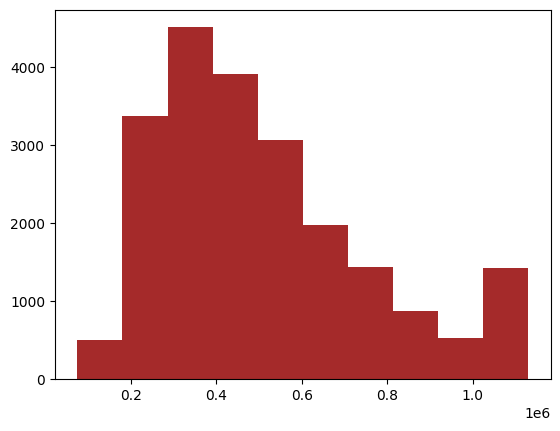

In [78]:
plt.hist(data['Sale Price'],bins=10,color='brown')

**outlier in target**

<Axes: ylabel='Sale Price'>

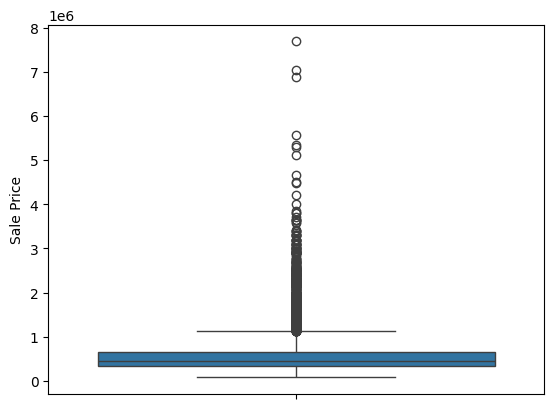

In [62]:
sns.boxplot(data['Sale Price'])

**outlier correction for target**

In [63]:
q1=data['Sale Price'].quantile(0.25)
q2=data['Sale Price'].quantile(0.50)
q3=data['Sale Price'].quantile(0.75)

In [64]:
print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)

q1 : 321950.0
q2 : 450000.0
q3 : 645000.0


In [65]:
iqr=q3-q1
iqr

323050.0

In [66]:
upper_lmt=q3+1.5*iqr
upper_lmt

1129575.0

In [67]:
lower_lmt=q1-1.5*iqr
lower_lmt

-162625.0

In [68]:
outlier=[]
for i in data['Sale Price']:
  if i>(upper_lmt) or i<(lower_lmt):
    outlier.append(i)

In [69]:
outlier

[1230000.0,
 2000000.0,
 1350000.0,
 1330000.0,
 1450000.0,
 2250000.0,
 1510000.0,
 2400000.0,
 2900000.0,
 1370000.0,
 2050000.0,
 3080000.0,
 2380000.0,
 1380000.0,
 1400000.0,
 1350000.0,
 1550000.0,
 1300000.0,
 1450000.0,
 1200000.0,
 1150000.0,
 1390000.0,
 1280000.0,
 1200000.0,
 1490000.0,
 2250000.0,
 1600000.0,
 2130000.0,
 1450000.0,
 1950000.0,
 1220000.0,
 3070000.0,
 1250000.0,
 1150000.0,
 1480000.0,
 1580000.0,
 1300000.0,
 1310000.0,
 2250000.0,
 1360000.0,
 1220000.0,
 2400000.0,
 1270000.0,
 1200000.0,
 1320000.0,
 2450000.0,
 1240000.0,
 1570000.0,
 1130000.0,
 1200000.0,
 1280000.0,
 1960000.0,
 1750000.0,
 5110000.0,
 1150000.0,
 1880000.0,
 1230000.0,
 2300000.0,
 2260000.0,
 5300000.0,
 1200000.0,
 2200000.0,
 1130000.0,
 1180000.0,
 1700000.0,
 1400000.0,
 2540000.0,
 1360000.0,
 1230000.0,
 5350000.0,
 1330000.0,
 1220000.0,
 1250000.0,
 1300000.0,
 1180000.0,
 1380000.0,
 1150000.0,
 1200000.0,
 2250000.0,
 1230000.0,
 1270000.0,
 1680000.0,
 1930000.0,
 118

In [74]:
data['Sale Price']=data['Sale Price'].clip(lower=lower_lmt,upper=upper_lmt)

<Axes: ylabel='Sale Price'>

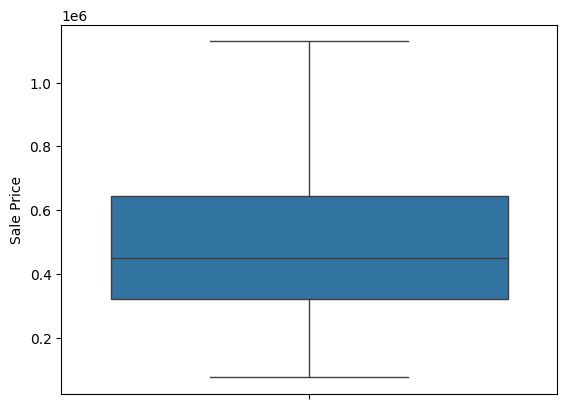

In [76]:
sns.boxplot(data['Sale Price'])

**target missing values**

In [33]:
data['Sale Price'].isna().sum()

4

In [79]:
data['Sale Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: Sale Price
Non-Null Count  Dtype  
--------------  -----  
21609 non-null  float64
dtypes: float64(1)
memory usage: 169.0 KB


In [80]:
4/21613

0.0001850737981770231



*   so we can delete this 4 null value




In [82]:
data.dropna(inplace=True,axis=0,subset='Sale Price')

In [83]:
data['Sale Price'].isna().sum()

0

**TREATING NULL VALUES OF NUMERICAL COLUMNS**



*   To select whether mean or median is better for missing value filling, we want to know their distributions




array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Sale Price'}>,
        <Axes: title={'center': 'No of Bedrooms'}>,
        <Axes: title={'center': 'No of Bathrooms'}>],
       [<Axes: title={'center': 'Flat Area (in Sqft)'}>,
        <Axes: title={'center': 'Lot Area (in Sqft)'}>,
        <Axes: title={'center': 'No of Floors'}>,
        <Axes: title={'center': 'Overall Grade'}>],
       [<Axes: title={'center': 'Area of the House from Basement (in Sqft)'}>,
        <Axes: title={'center': 'Basement Area (in Sqft)'}>,
        <Axes: title={'center': 'Age of House (in Years)'}>,
        <Axes: title={'center': 'Renovated Year'}>],
       [<Axes: title={'center': 'Zipcode'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Living Area after Renovation (in Sqft)'}>],
       [<Axes: title={'center': 'Lot Area after Renovation (in Sqft)'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=obj

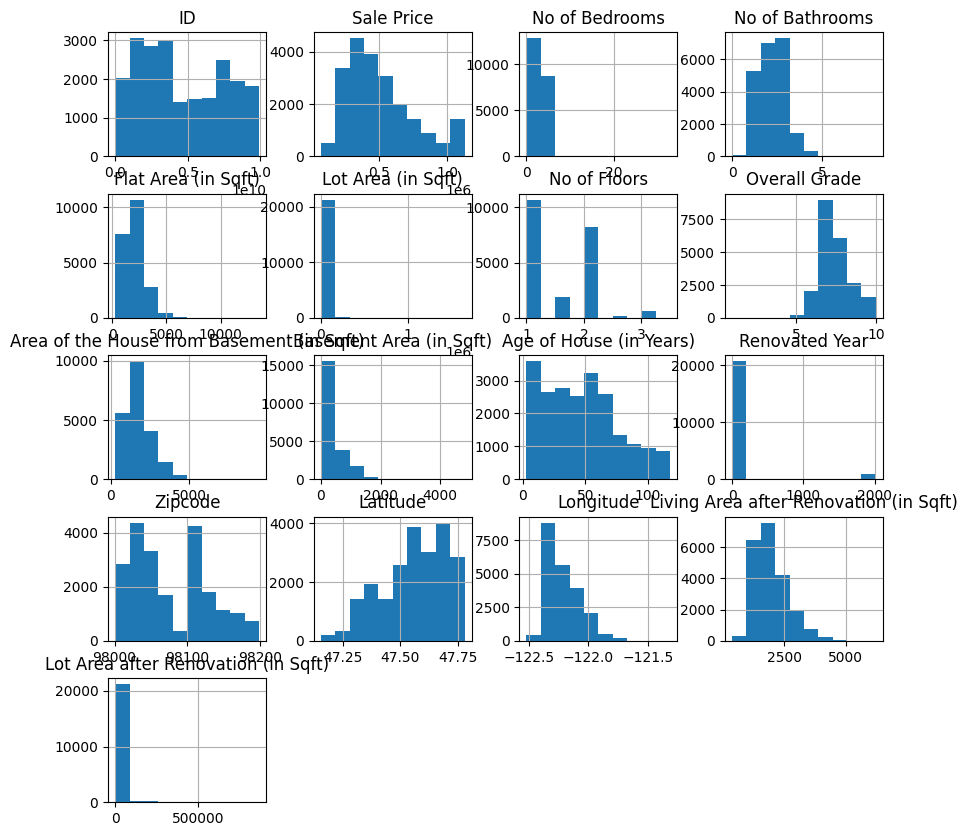

In [101]:
frequencies = data.select_dtypes(include=['int64', 'float64'])
frequencies.hist(figsize=(10,10))

In [95]:
from sklearn.impute import SimpleImputer

In [96]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')

In [103]:
num_col=data.select_dtypes(include=['int64','float64']).columns.tolist()

In [104]:
data[num_col]=imputer.fit_transform(data[num_col])

In [105]:
data.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
No of Times Visited,0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

**outlier for numerical data**

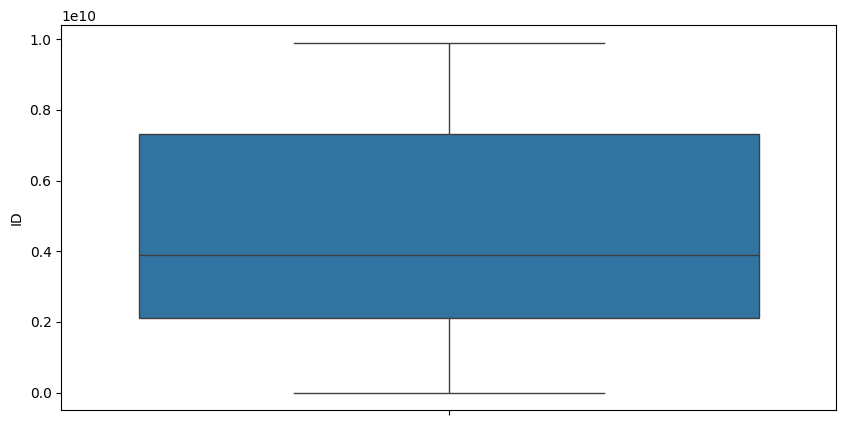

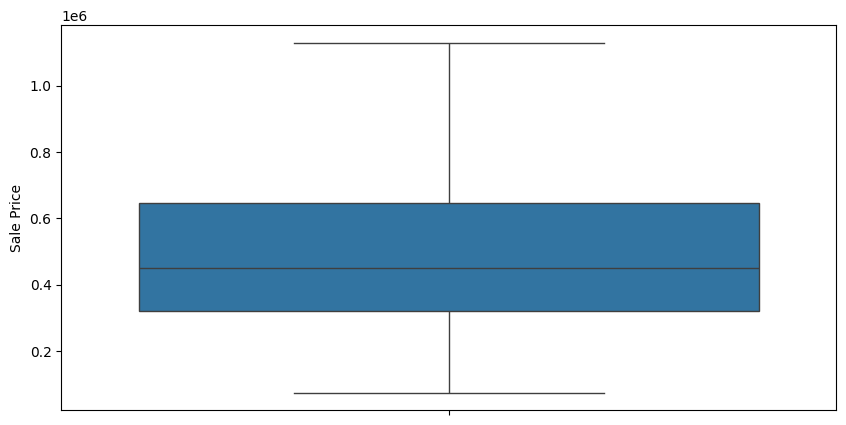

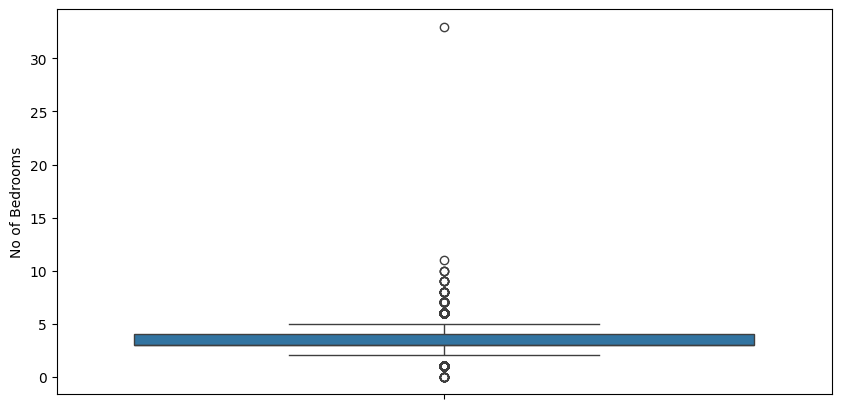

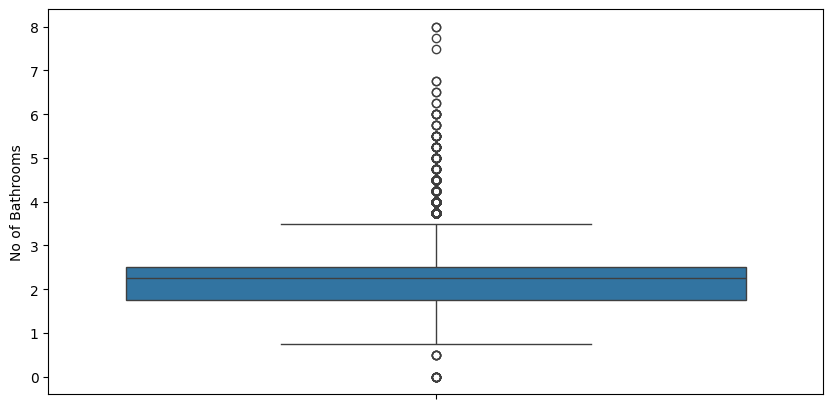

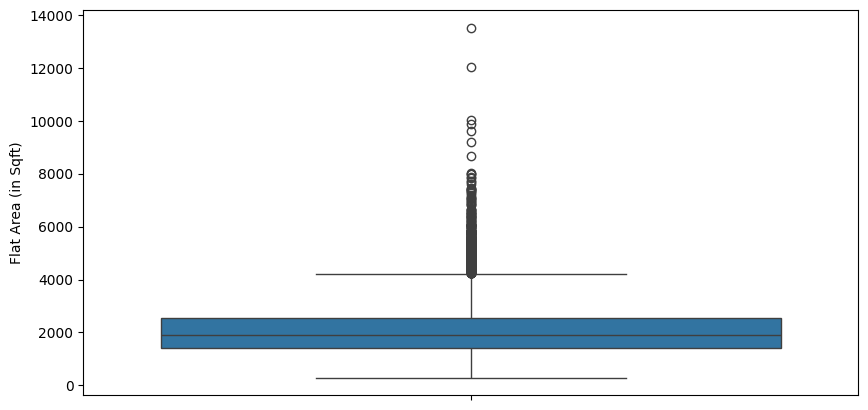

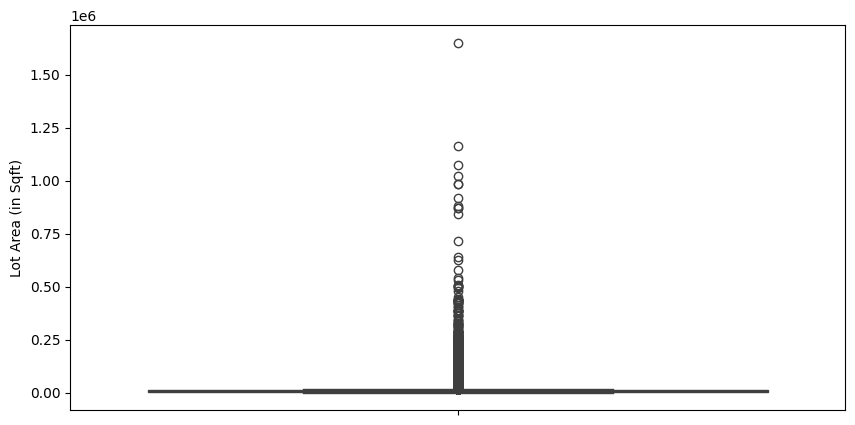

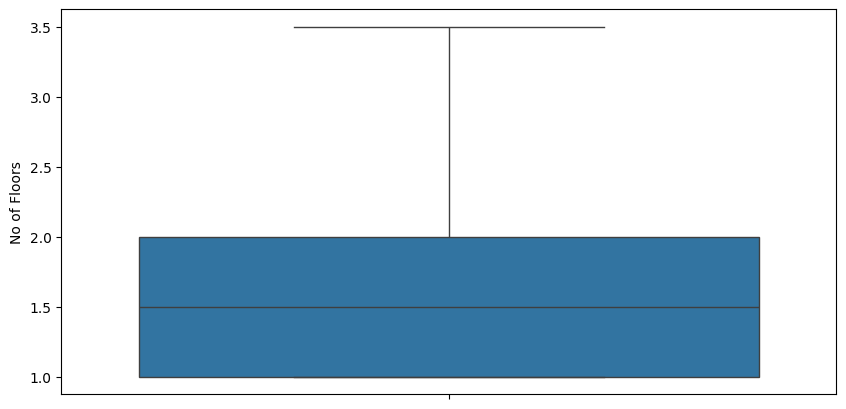

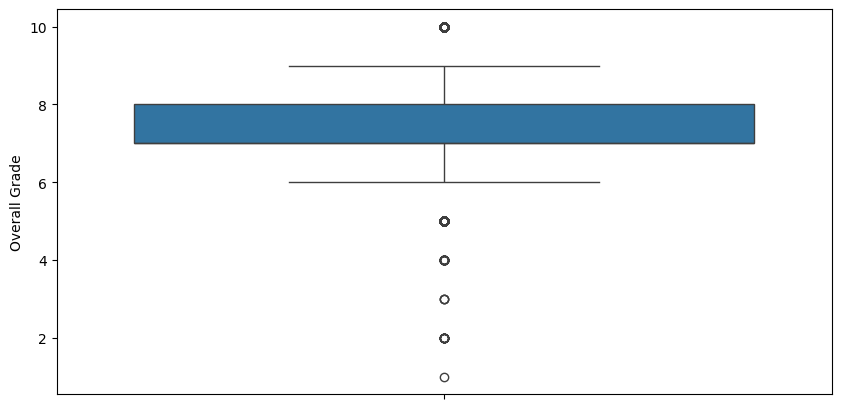

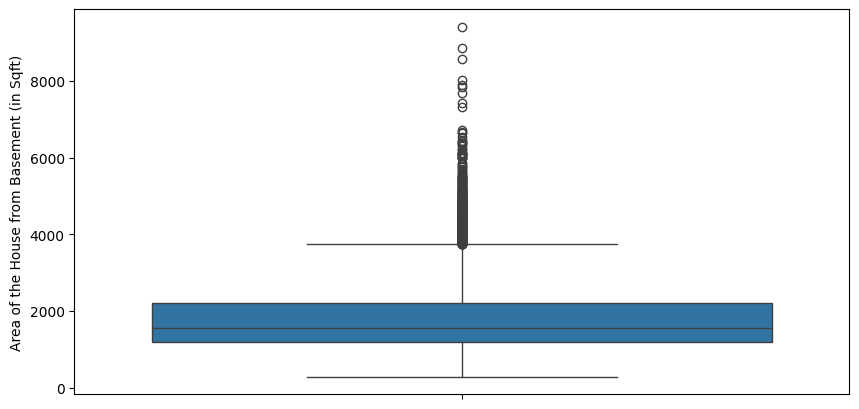

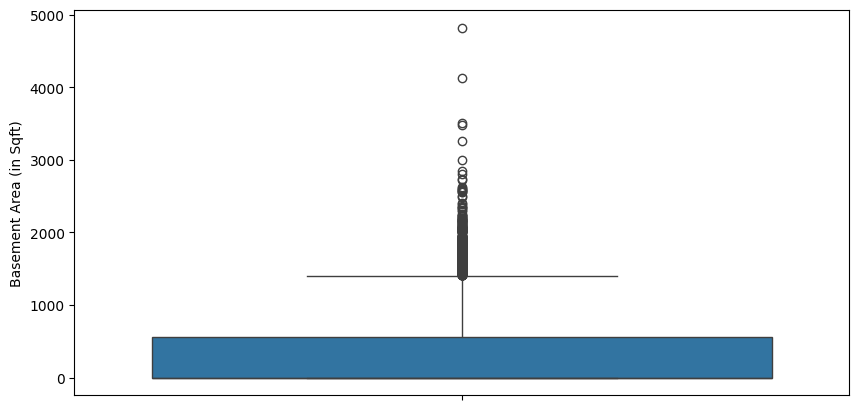

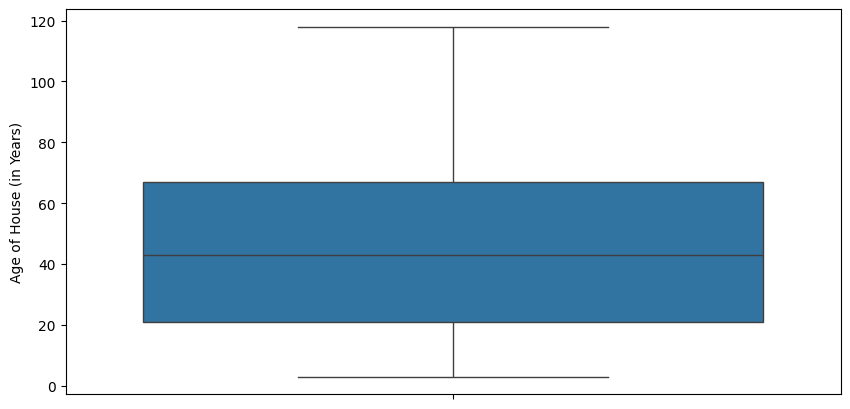

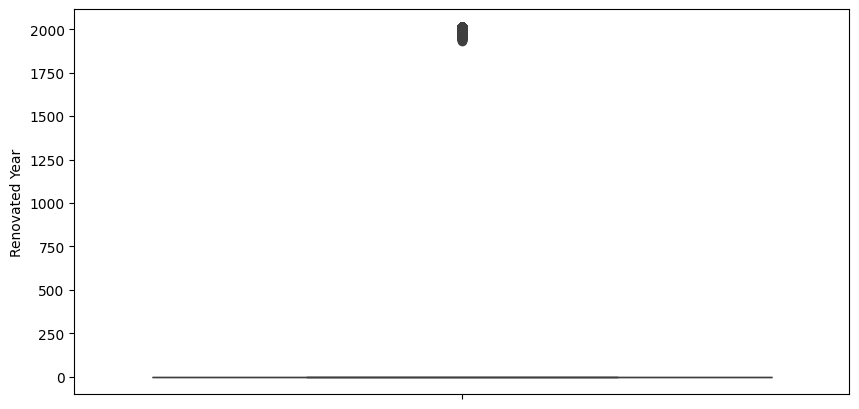

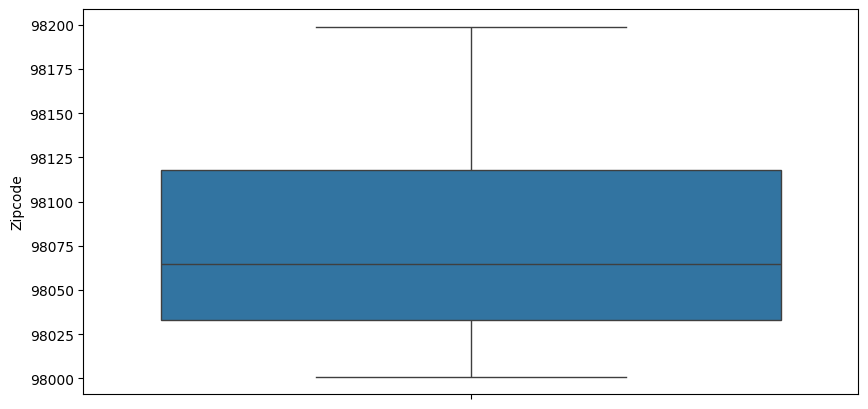

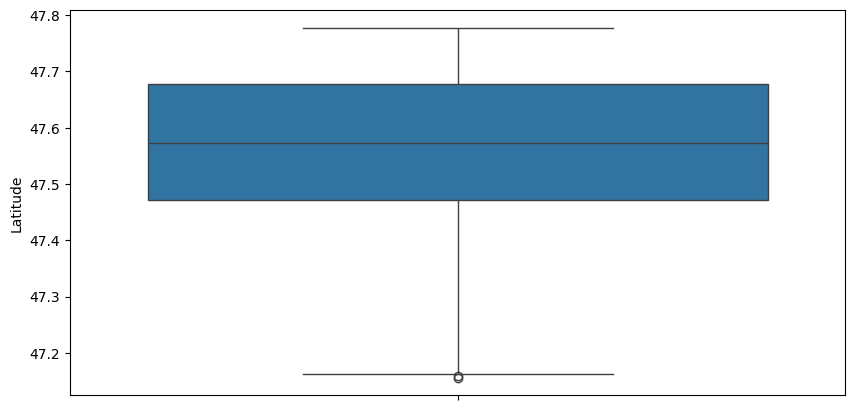

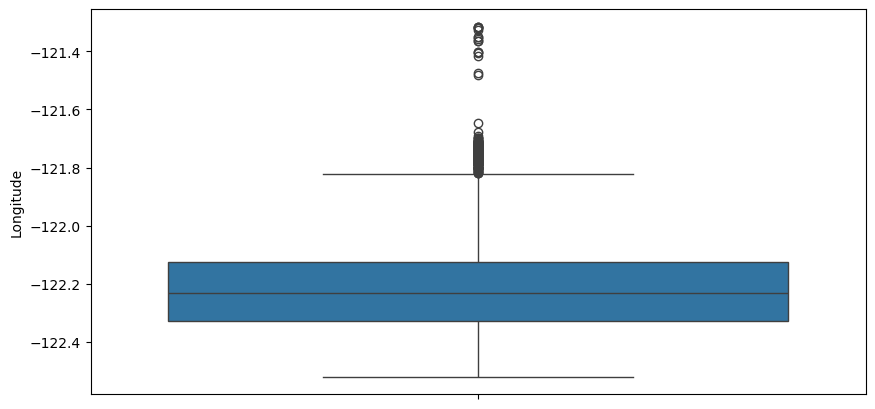

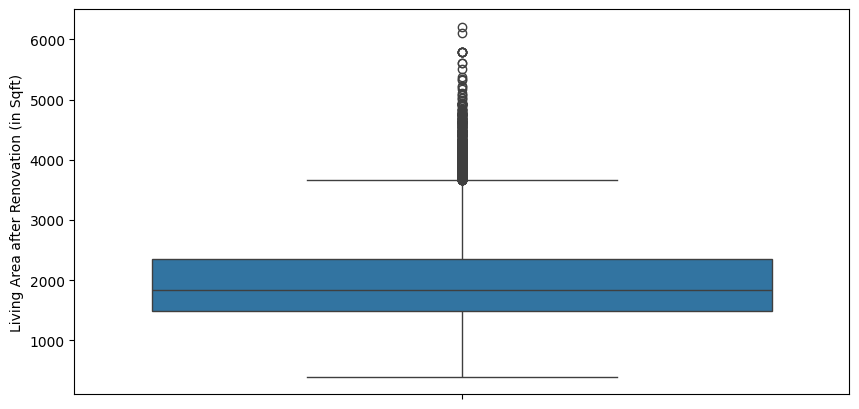

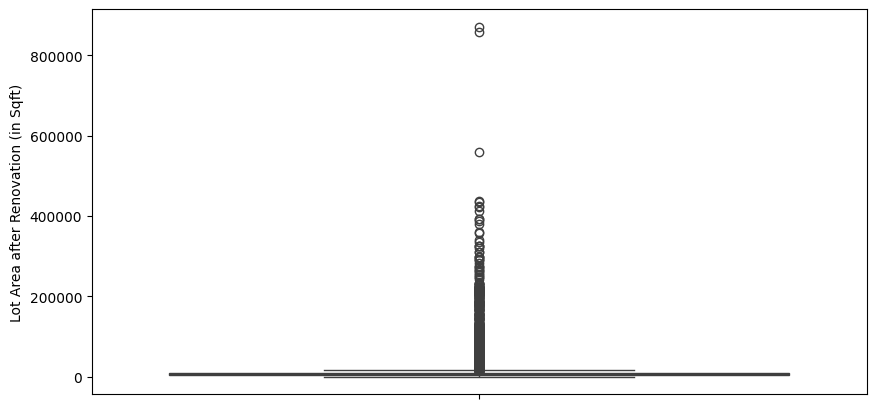

In [112]:
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[i])

**outlier correction**

In [120]:
for i in num_col:
  q1=data[i].quantile(0.25)
  q2=data[i].quantile(0.50)
  q3=data[i].quantile(0.75)
  iqr=q3-q1
  upper_lmt=q3+1.5*iqr
  lower_lmt=q1-1.5*iqr
  outlier=[]
  for j in data[i]:
    if j>(upper_lmt) or j<(lower_lmt):
      outlier.append(j)
  data[i]=data[i].clip(lower=lower_lmt,upper=upper_lmt)

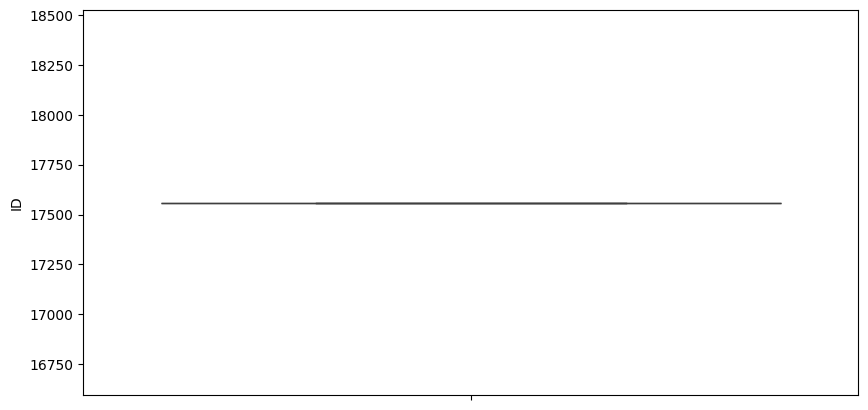

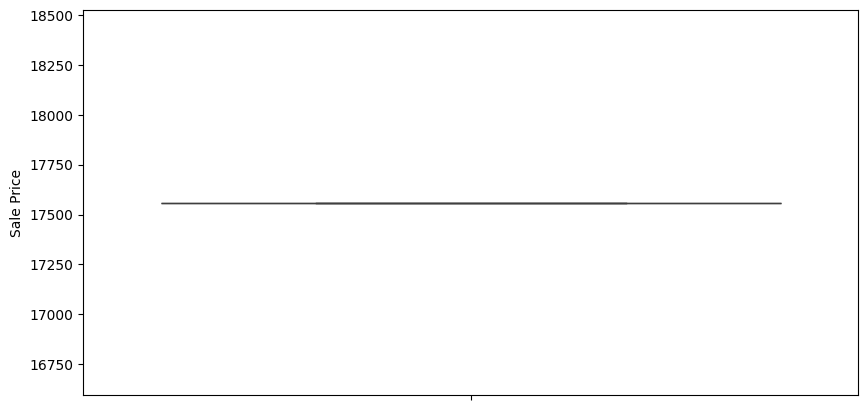

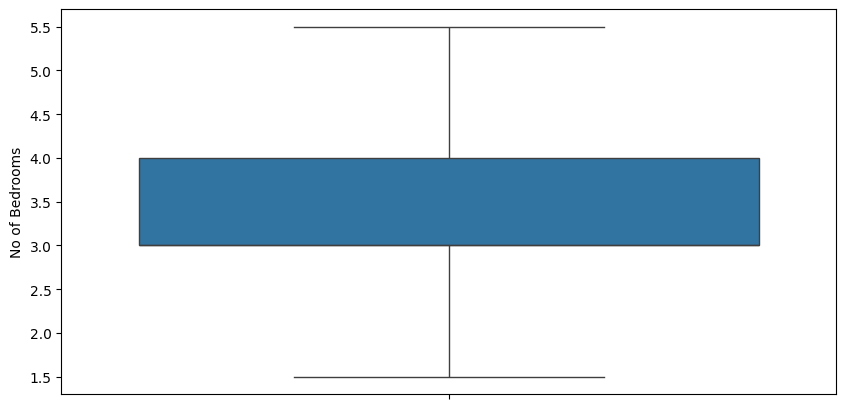

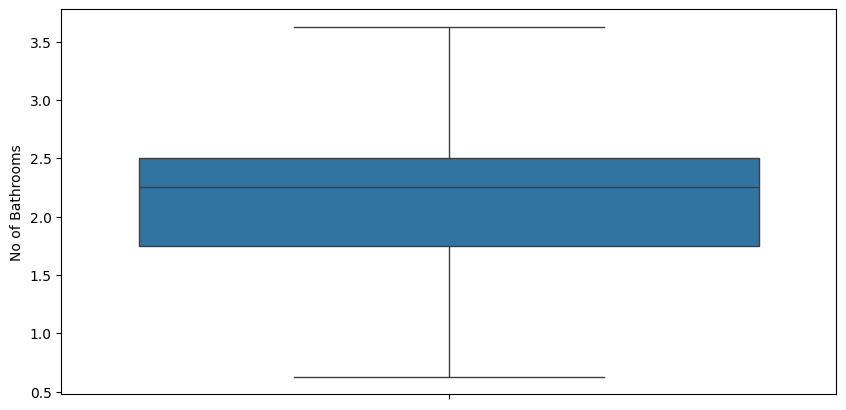

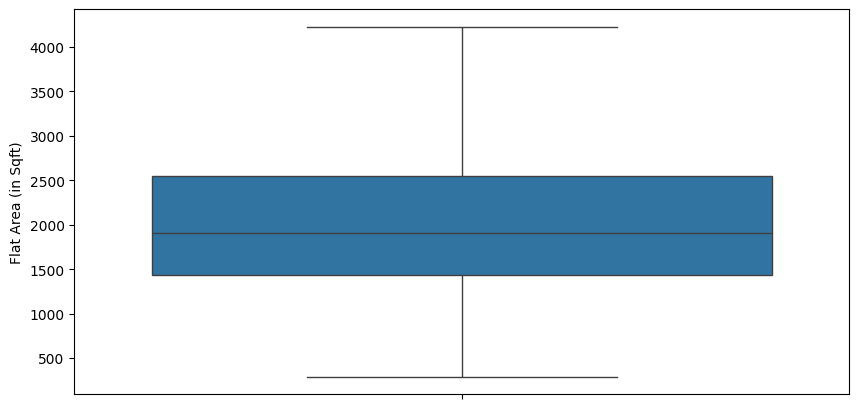

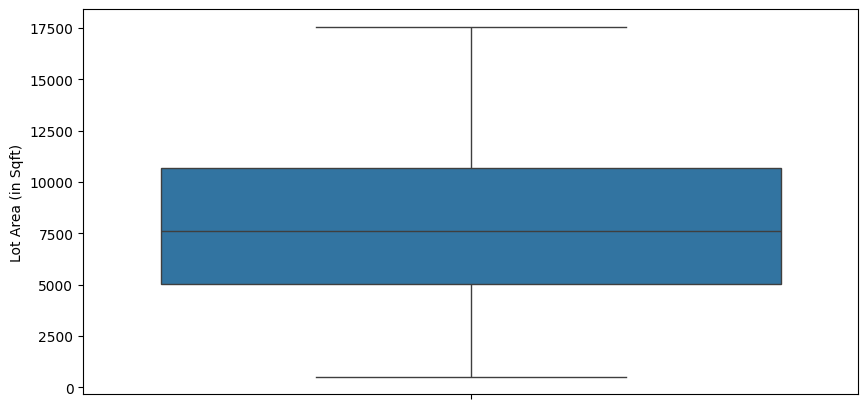

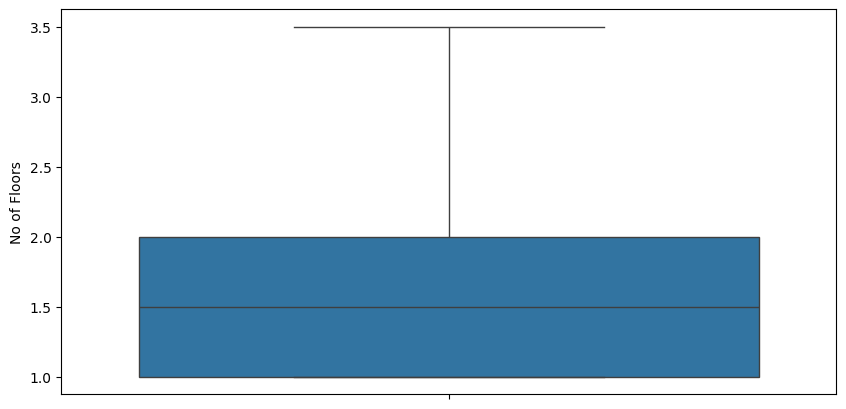

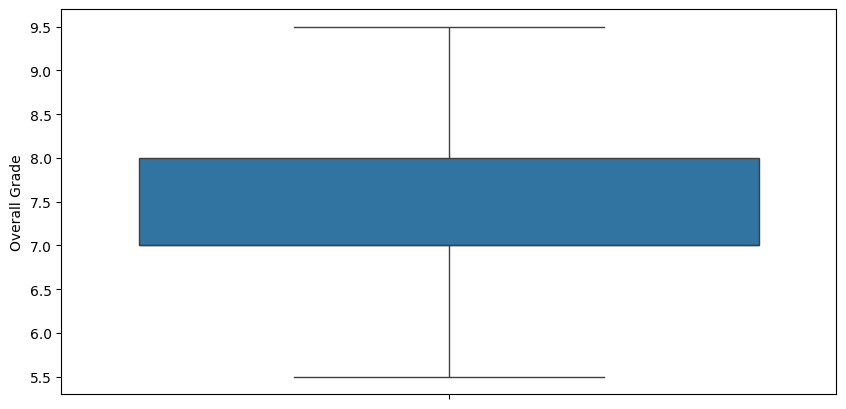

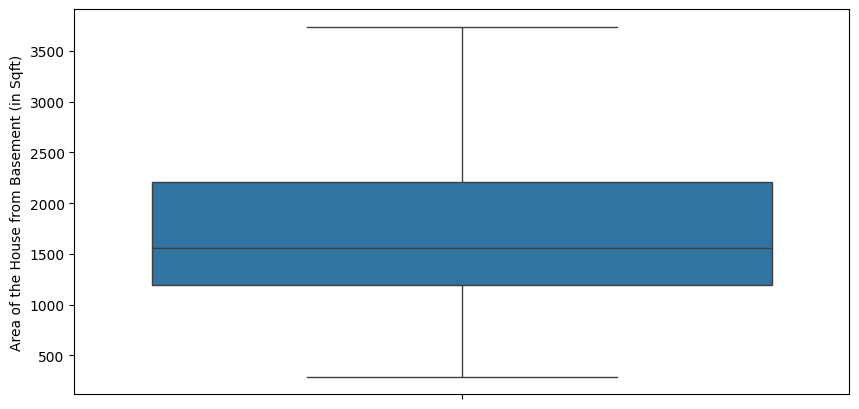

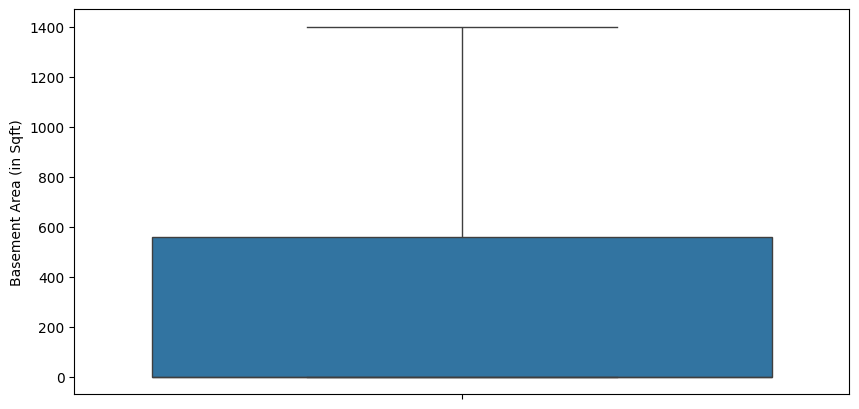

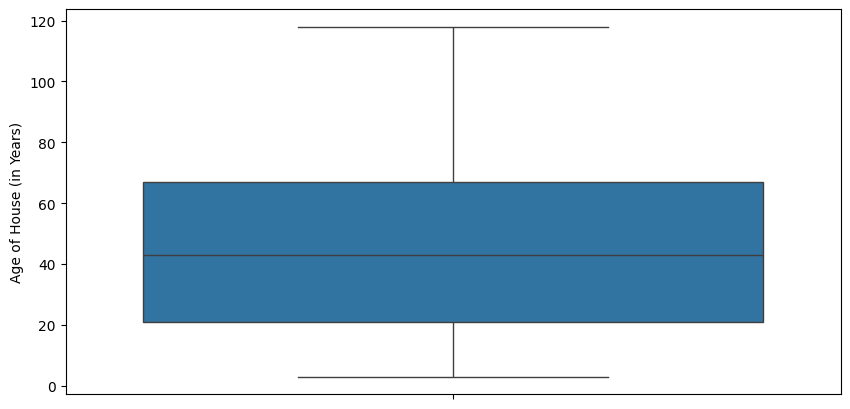

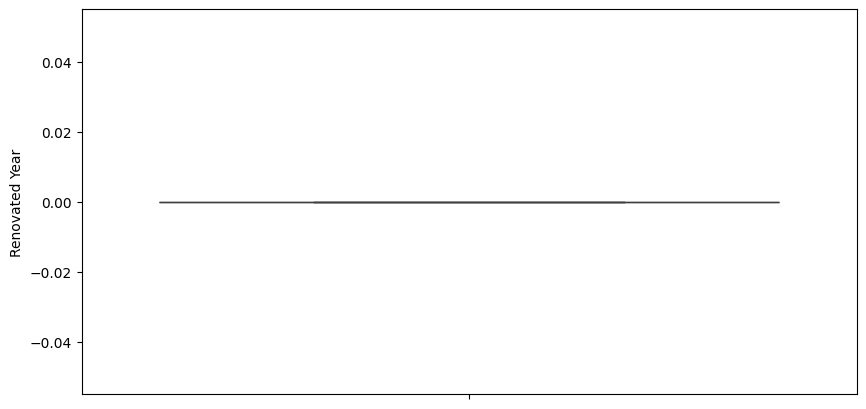

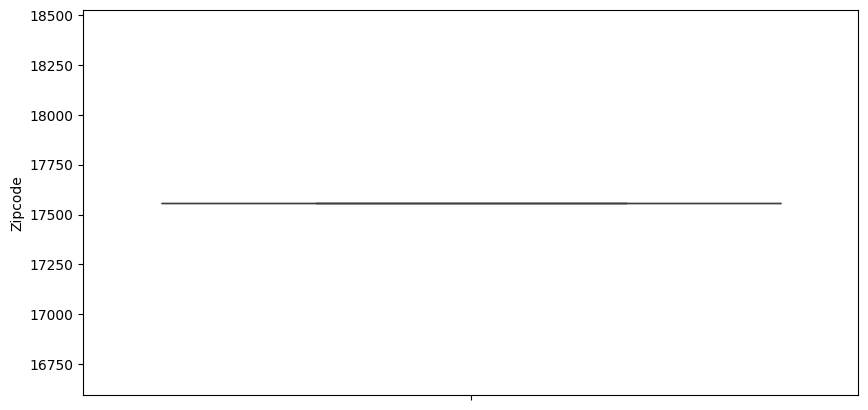

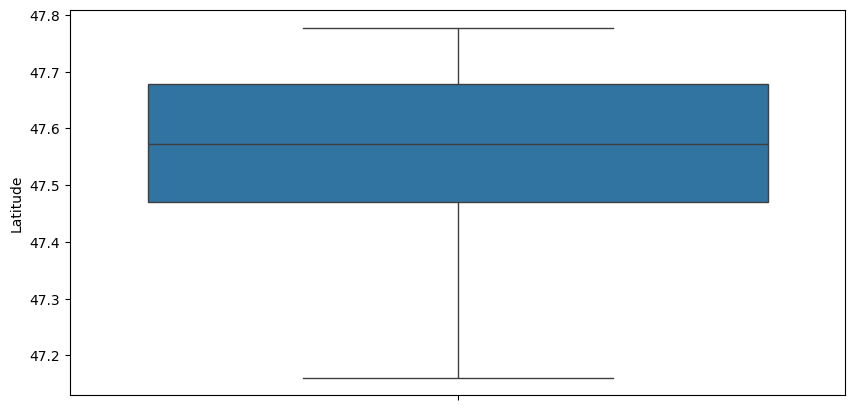

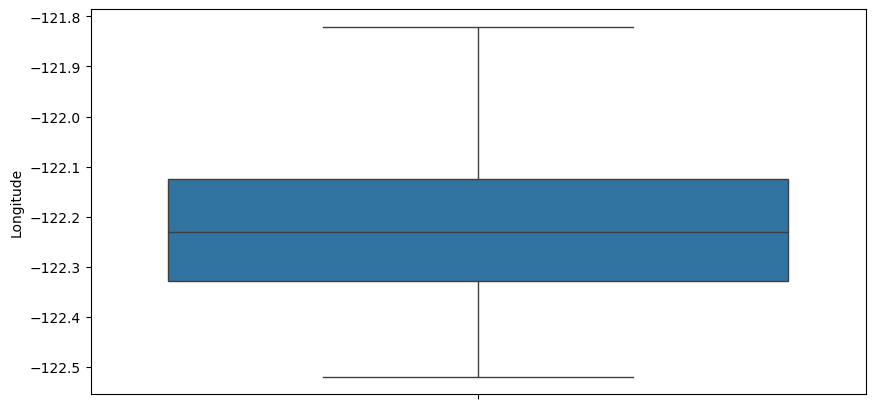

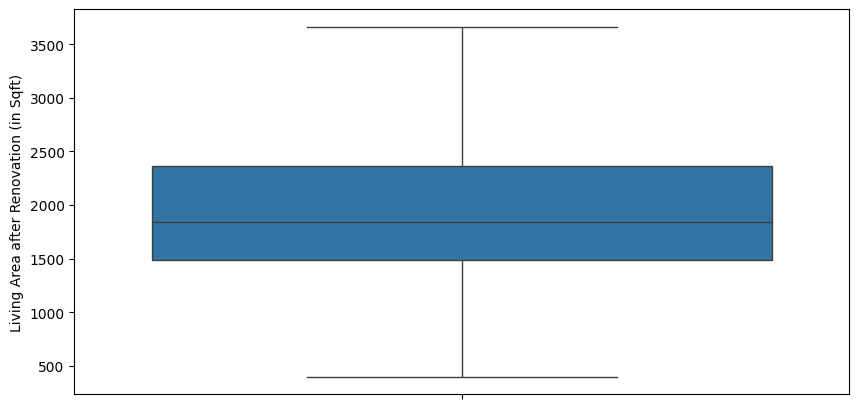

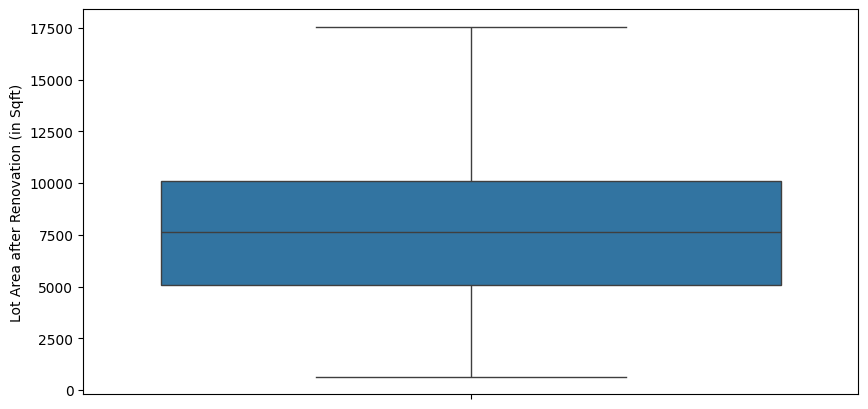

In [121]:
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[i])

**ENCODING**

In [122]:
cate_col=data.select_dtypes(include='object').columns.tolist()

In [125]:
cate_col

['Date House was Sold',
 'Waterfront View',
 'No of Times Visited',
 'Condition of the House']

In [127]:
for i in cate_col:
  print(data[i].value_counts())

Date House was Sold
15-Apr-16    2231
14-Jul-17    2211
14-Jun-17    2179
14-Aug-17    1940
14-Oct-17    1878
15-Mar-16    1874
14-Sep-17    1774
14-May-17    1767
14-Dec-17    1471
14-Nov-17    1411
15-Feb-16    1249
15-Jan-16     978
15-May-16     646
Name: count, dtype: int64
Waterfront View
No     21446
Yes      163
Name: count, dtype: int64
No of Times Visited
0         19535
Twice       936
Thrice      500
Once        327
Four        311
Name: count, dtype: int64
Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64


In [130]:
data1=data.drop('Date House was Sold',axis=1)
data1.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,17560.0,17560.0,3.0,1.00,1180.0,5650.0,1.0,No,0,Fair,7.0,1180.0,0.0,63.0,0.0,17560.0,47.5112,-122.257,1340.0,5650.0
1,17560.0,17560.0,3.0,2.25,2570.0,7242.0,2.0,No,0,Fair,7.0,2170.0,400.0,67.0,0.0,17560.0,47.7210,-122.319,1690.0,7639.0
2,17560.0,17560.0,2.0,1.00,770.0,10000.0,1.0,No,0,Fair,6.0,770.0,0.0,85.0,0.0,17560.0,47.7379,-122.233,2720.0,8062.0
3,17560.0,17560.0,4.0,3.00,1960.0,5000.0,1.0,No,0,Excellent,7.0,1050.0,910.0,53.0,0.0,17560.0,47.5208,-122.393,1360.0,5000.0
4,17560.0,17560.0,3.0,2.00,1680.0,8080.0,1.0,No,0,Fair,8.0,1680.0,0.0,31.0,0.0,17560.0,47.6168,-122.045,1800.0,7503.0




  **LABEL ENCODING**




'No of Times Visited','Condition of the House' are ordered data

In [131]:
from sklearn.preprocessing import LabelEncoder

In [132]:
label_en=LabelEncoder()

In [133]:
data1['No of Times Visited']=label_en.fit_transform(data1['No of Times Visited'])

In [135]:
data1['Condition of the House']=label_en.fit_transform(data1['Condition of the House'])

In [155]:
data1['Waterfront View']=label_en.fit_transform(data1['Waterfront View'])

In [156]:
data1.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,17560.0,17560.0,3.0,1.00,1180.0,5650.0,1.0,0,0,2,7.0,1180.0,0.0,63.0,0.0,17560.0,47.5112,-122.257,1340.0,5650.0
1,17560.0,17560.0,3.0,2.25,2570.0,7242.0,2.0,0,0,2,7.0,2170.0,400.0,67.0,0.0,17560.0,47.7210,-122.319,1690.0,7639.0
2,17560.0,17560.0,2.0,1.00,770.0,10000.0,1.0,0,0,2,6.0,770.0,0.0,85.0,0.0,17560.0,47.7379,-122.233,2720.0,8062.0
3,17560.0,17560.0,4.0,3.00,1960.0,5000.0,1.0,0,0,1,7.0,1050.0,910.0,53.0,0.0,17560.0,47.5208,-122.393,1360.0,5000.0
4,17560.0,17560.0,3.0,2.00,1680.0,8080.0,1.0,0,0,2,8.0,1680.0,0.0,31.0,0.0,17560.0,47.6168,-122.045,1800.0,7503.0


**Scaling**

In [157]:
sc=StandardScaler()

In [158]:
data1=sc.fit_transform(data1)

In [162]:
data1=pd.DataFrame(data1)
data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,-0.424769,-1.521515,-1.046571,-0.614167,-0.915389,-0.087181,-0.30395,-0.338178,-0.595309,-0.771688,-0.681108,0.544734,0.0,0.0,-0.352580,-0.306932,-0.978577,-0.606987
1,0.0,0.0,-0.424769,0.209958,0.610436,-0.273175,0.936817,-0.087181,-0.30395,-0.338178,-0.595309,0.524273,0.278019,0.680915,0.0,0.0,1.161649,-0.758798,-0.439299,-0.151213
2,0.0,0.0,-1.595762,-1.521515,-1.535328,0.317565,-0.915389,-0.087181,-0.30395,-0.338178,-1.593797,-1.308400,-0.681108,1.293731,0.0,0.0,1.283625,-0.132016,1.147721,-0.054284
3,0.0,0.0,0.746225,1.248841,-0.116739,-0.753392,-0.915389,-0.087181,-0.30395,-2.053196,-0.595309,-0.941865,1.500907,0.204281,0.0,0.0,-0.283292,-1.298122,-0.947761,-0.755933
4,0.0,0.0,-0.424769,-0.136337,-0.450525,-0.093682,-0.915389,-0.087181,-0.30395,-0.338178,0.403180,-0.117163,-0.681108,-0.544715,0.0,0.0,0.409587,1.238158,-0.269811,-0.182377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,0.0,0.0,-0.424769,0.556252,-0.629339,-1.582099,2.789023,-0.087181,-0.30395,-0.338178,0.403180,-0.313520,-0.681108,-1.293712,0.0,0.0,1.005030,-0.955579,-0.685826,-1.555886
21605,0.0,0.0,0.746225,0.556252,0.300493,-0.579254,0.936817,-0.087181,-0.30395,-0.338178,0.403180,0.707540,-0.681108,-1.463938,0.0,0.0,-0.356188,-1.072189,-0.223587,-0.251809
21606,0.0,0.0,-1.595762,-1.867809,-1.237305,-1.535191,0.936817,-0.087181,-0.30395,-0.338178,-0.595309,-0.981137,-0.681108,-1.293712,0.0,0.0,0.247915,-0.613035,-1.471632,-1.441770
21607,0.0,0.0,-0.424769,0.556252,-0.545892,-1.312860,0.936817,-0.087181,-0.30395,-0.338178,0.403180,-0.221887,-0.681108,-1.123485,0.0,0.0,-0.184412,1.063243,-0.870721,-1.606756
